In [61]:
import matplotlib.pyplot as plt
from numpy import genfromtxt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.ticker as mticker
import os

headers = ["event_id", "track_id", "type", "x", "y", "z", "delta_E", "process"]

def search_for_thing(column, search_param, my_data):
    electron_array = []
    for i in range(len(my_data.T[0])):
        if my_data.T[column][i] == search_param:
            electron_array.append(my_data[i])
    if len(electron_array) == 0:
        print("Couldn't find anything with", headers[column], f"= {search_param}")
    else: 
        print(headers[column], f" = {search_param}")
    return np.array(electron_array)


def find_electrons(my_data):
    arr = search_for_thing(2, 1, my_data) # look for electrons
    plt.scatter(arr.T[0], arr.T[1])
    plt.xlabel("event_id")
    plt.ylabel("track_id")
    
    
def integrate_over(event_num, track_num, data, param = 6, subtract = None):
    integrate = 0
    for i in range(len(data)):
        if data.T[0][i] == event_num and data.T[1][i] == track_num:
            if not subtract:
                integrate = integrate + data.T[param][i]
            if subtract:
                ## Need to check case where next track occurs but same event
                if data.T[0][i - 1] == event_num and data.T[1][i - 1] == track_num:
                    integrate = integrate + data.T[param][i] - data.T[param][i - 1]
                else:
                    integrate = integrate + 0
    return [event_num, track_num, integrate]
    
    
def track_length_and_energy(my_data):
    # integrate energy data over track_id, event_id
    integrated_energy_by_event = []
    integrated_length_by_event_x = []
    integrated_length_by_event_y = []
    integrated_length_by_event_z = []
    for event in range(0, 20):
        for track in range(0, 20):
            integrated_energy_by_event.append(integrate_over(event, track, my_data))
            # get track lengths, `subtract = 1` shows delta track length
            integrated_length_by_event_x.append(integrate_over(event, track, my_data, param = 3, subtract = 1))
            integrated_length_by_event_y.append(integrate_over(event, track, my_data, param = 4, subtract = 1))
            integrated_length_by_event_z.append(integrate_over(event, track, my_data, param = 5, subtract = 1))

    ## convert to np arrays
    integrated_energy_by_event = np.array(integrated_energy_by_event)
    integrated_length_by_event_x = np.array(integrated_length_by_event_x)
    integrated_length_by_event_y = np.array(integrated_length_by_event_y)
    integrated_length_by_event_z = np.array(integrated_length_by_event_z)

    ## find magnitude of track lengths
    integrated_length_by_event = np.sqrt((integrated_length_by_event_x.T[2])**2 + (integrated_length_by_event_y.T[2])**2 + (integrated_length_by_event_z.T[2])**2)
    return integrated_length_by_event, integrated_energy_by_event



In [62]:
print(os.listdir("spectrum/"))

['6083.5', '6476', '7708', '7281', '6338.7', '6053.6', '7626', '4473', '5393', '5880.3', '7519', '5656', '6921.6', '7190', '5850', '6283.8', '6100', '7271', '6566.2', '7246']


type  = 1


/var/folders/6p/h1y3sh3s22dbsx_k6l69dsn00000gn/T/ipykernel_3189/470770424.py:14: RuntimeWarning: divide by zero encountered in divide
  mevcm = (-integrated_energy_by_event.T[2])/(integrated_length_by_event * .1)
/var/folders/6p/h1y3sh3s22dbsx_k6l69dsn00000gn/T/ipykernel_3189/470770424.py:14: RuntimeWarning: invalid value encountered in divide
  mevcm = (-integrated_energy_by_event.T[2])/(integrated_length_by_event * .1)


1.0 13.0 inf -0.000131192 0.0
12.0 13.0 inf -0.06514055 0.0
17.0 11.0 inf -0.0027339125 0.0
19.0 13.0 inf -0.00106356 0.0
type  = 1
1.0 12.0 inf -0.000405937 0.0
1.0 16.0 inf -0.02379393 0.0
1.0 19.0 inf -0.00346255 0.0
7.0 17.0 inf -0.00130364 0.0
19.0 13.0 inf -0.00106356 0.0
type  = 1
0.0 12.0 inf -0.000378297 0.0
1.0 14.0 inf -0.02450069 0.0
9.0 12.0 inf -0.0030405568 0.0
11.0 15.0 inf -0.0005148325 0.0
13.0 9.0 inf -0.010125826 0.0
13.0 12.0 inf -0.016316321 0.0
13.0 13.0 inf -0.0032295772 0.0
type  = 1
0.0 12.0 inf -0.000374855 0.0
0.0 17.0 inf -0.0018819797 0.0
4.0 16.0 inf -0.00715462 0.0
4.0 17.0 inf -0.00602841 0.0
5.0 8.0 inf -0.0068723000000000005 0.0
9.0 12.0 inf -0.0030405568 0.0
14.0 10.0 inf -0.000977937 0.0
15.0 15.0 inf -0.01776371 0.0
15.0 17.0 inf -0.006386975 0.0
19.0 13.0 inf -0.00106356 0.0
type  = 1
0.0 9.0 inf -0.008707065 0.0
1.0 13.0 inf -0.000131192 0.0
7.0 17.0 inf -0.0010583479 0.0
12.0 9.0 inf -0.0025285888 0.0
12.0 18.0 inf -0.0056207429000000005 0.0
17.

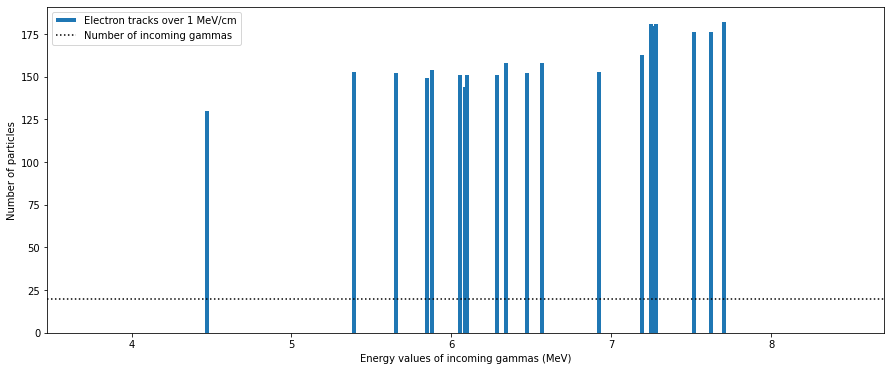

In [85]:
spectrum = os.listdir("spectrum/")
spectrum = [4473]
counts = []
energy = []
for i in spectrum:
    my_data = []
    my_data = genfromtxt(f'spectrum/{i}/run_nt_Hits_t0.csv', delimiter=',')
    # only keep electron data
    my_data = search_for_thing(2, 1, my_data)


    integrated_length_by_event, integrated_energy_by_event = track_length_and_energy(my_data)

    mevcm = (-integrated_energy_by_event.T[2])/(integrated_length_by_event * .1)
    
    """
    # event id, track id, integrated energy
    cmap = plt.cm.get_cmap("gist_gray", 8)
    plt.scatter(integrated_energy_by_event.T[0], integrated_energy_by_event.T[1], c=integrated_energy_by_event.T[2], cmap=cmap)
    cbar = plt.colorbar()
    cbar.set_label("Integrated energy in MeV")
    plt.show()
    
    # event id, track id, mev/cm
    cmap = plt.cm.get_cmap("gist_gray_r", 8)
    plt.scatter(integrated_energy_by_event.T[0], integrated_energy_by_event.T[1], c=mevcm, cmap=cmap)
    cbar = plt.colorbar()
    cbar.set_label("Integrated energy in MeV")


    """
    count = 0
    for j in mevcm:
        if j > 1.0:
            #print(j)
            count += 1
        if j == np.inf:
            count += 0 
            #print("oops")

            
    for k, val in enumerate(mevcm):
        if val == np.inf:
            print(integrated_energy_by_event.T[0][k], integrated_energy_by_event.T[1][k], val, integrated_energy_by_event.T[2][k], integrated_length_by_event[k])
    counts.append(count)
    energy.append(float(i))
    

print(counts)
plt.figure(figsize=(15, 6))

energy = [i/1000 for i in energy]
plt.vlines(energy, 0, counts, color='C0', lw=4, label = "Electron tracks over 1 MeV/cm")
plt.axhline(y = 20, color = "k", linestyle = ':', label = "Number of incoming gammas")
#plt.hist(energy, len(energy), weights = counts)
#plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(1))
plt.ylim(0)
plt.xlim(min(energy) - 1, max(energy) + 1)

plt.xlabel("Energy values of incoming gammas (MeV)")
plt.ylabel("Number of particles")
plt.legend(loc = "upper left")
plt.show()

In [88]:
my_data = genfromtxt(f'spectrum/4473/run_nt_Hits_t0.csv', delimiter=',')

my_data = search_for_thing(2, 1, my_data)


count = 0
for i, val in enumerate(my_data):
    if my_data[i-1][1]:
        if my_data[i][1] != my_data[i-1][1]:
            count += 1



print(count)


type  = 1
129


type  = 1
151


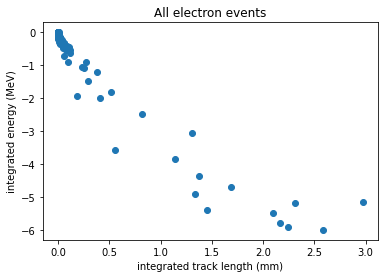

In [93]:
my_data = genfromtxt(f'spectrum/6283.8/run_nt_Hits_t0.csv', delimiter=',')
# only keep electron data
my_data = search_for_thing(2, 1, my_data)


integrated_length_by_event, integrated_energy_by_event = track_length_and_energy(my_data)

# plot length of track vs energy for electrons
plt.scatter(integrated_length_by_event, integrated_energy_by_event.T[2])

#test = (-integrated_energy_by_event.T[2])/(integrated_length_by_event * .1)

count = 0
for i in test:
    if i > 1.0:
        count += 1

print(count)

    # 2 MeV/cm mean energy loss from minimum ionizing particle 
    # corresponds to 20 and 30, 000 elefctrons on a collection wire

plt.xlabel("integrated track length (mm)")
plt.ylabel("integrated energy (MeV)")
plt.title("All electron events")
plt.show()

In [96]:
my_data = genfromtxt(f'spectrum/6283.8/run_nt_Hits_t0.csv', delimiter=',')
print(my_data)

[[ 0.00000e+00  1.00000e+00  0.00000e+00 ...  1.00000e+03  0.00000e+00
   0.00000e+00]
 [ 0.00000e+00  1.00000e+00  0.00000e+00 ...  1.00000e+03  0.00000e+00
   0.00000e+00]
 [ 0.00000e+00  1.00000e+00  0.00000e+00 ...  1.00000e+03  0.00000e+00
   0.00000e+00]
 ...
 [ 1.90000e+01  2.00000e+01  1.00000e+00 ...  1.07087e+03 -7.28085e-04
   0.00000e+00]
 [ 1.90000e+01  2.00000e+01  1.00000e+00 ...  1.07087e+03 -1.44512e-02
   0.00000e+00]
 [ 1.90000e+01  2.00000e+01  1.00000e+00 ...  1.07087e+03  0.00000e+00
   0.00000e+00]]
